In [1]:
import os

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [2]:
alexNetTransform = transforms.Compose([
    transforms.Resize((227)),
    transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [3]:
alex_net_train = ImageFolder(
    root="assets/asl/asl_alphabet_train",
    transform=alexNetTransform
)
test_data_alex = ImageFolder(
    root="assets/asl/asl_alphabet_test",
    transform=alexNetTransform
)

In [4]:
arr = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V",
       "W", "X", "Y", "Z", "del", "nothing", "space"]
for i in range(29):
    print(f"{arr[i]}: {(alex_net_train.targets).count(i)}")

A: 3000
B: 3000
C: 3000
D: 3000
E: 3000
F: 3000
G: 3000
H: 3000
I: 3000
J: 3000
K: 3000
L: 3000
M: 3000
N: 3000
O: 3000
P: 3000
Q: 3000
R: 3000
S: 3000
T: 3000
U: 3000
V: 3000
W: 3000
X: 3000
Y: 3000
Z: 3000
del: 3000
nothing: 3000
space: 3000


In [5]:
alex_train_dataloader = DataLoader(alex_net_train, batch_size=128, shuffle=True)
alex_test_dataloader = DataLoader(test_data_alex, batch_size=128, shuffle=True)

In [6]:
train_features, train_labels = next(iter(alex_train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([128, 3, 227, 227])
Labels batch shape: torch.Size([128])


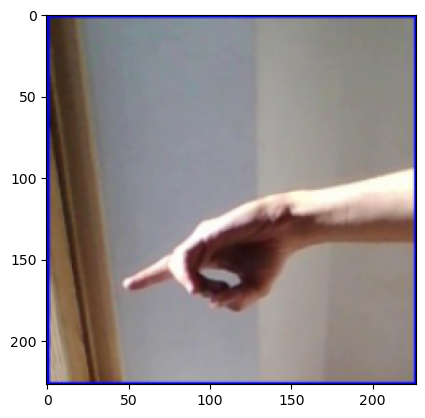

In [8]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
plt.imshow(alex_net_train[11100][0].T)

In [36]:
import random
from torchvision import datasets

dataset = datasets.ImageFolder('./sign_lang/asl_alphabet_train/asl_alphabet_train/')

#count of each class
class_count = {}
for file in dataset.imgs:
    cls = file[1]
    if cls not in class_count:
        class_count[cls] = 0
    class_count[cls] += 1

n_items_per_class = 500

# Selecting a random subset of images for each class
selected_files = []
for cls, count in class_count.items():
    class_files = [file for file in dataset.imgs if file[1] == cls]
    selected_files.extend(random.sample(class_files, min(n_items_per_class, count)))

selected_dataset = datasets.ImageFolder('./sign_lang/asl_alphabet_train/asl_alphabet_train/',
                                        [file[0] for file in selected_files])

In [37]:
selected_dataset = datasets.ImageFolder(
    './sign_lang/asl_alphabet_train/asl_alphabet_train/',
    transform=alexNetTransform,  # Assuming you have a transform defined
    is_valid_file=lambda x: x in [file[0] for file in selected_files]
)

arr = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V",
       "W", "X", "Y", "Z", "del", "nothing", "space"]
for i in range(29):
    print(f"{arr[i]}: {(selected_dataset.targets).count(i)}")

A: 500
B: 500
C: 500
D: 500
E: 500
F: 500
G: 500
H: 500
I: 500
J: 500
K: 500
L: 500
M: 500
N: 500
O: 500
P: 500
Q: 500
R: 500
S: 500
T: 500
U: 500
V: 500
W: 500
X: 500
Y: 500
Z: 500
del: 500
nothing: 500
space: 500


In [38]:
train_data = DataLoader(selected_dataset, batch_size=128, shuffle=True)

In [39]:
len(train_data.dataset.targets)

14500

In [40]:
import torch.nn as nn
import torch.nn.functional as F


#AlexNet implementation
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0)
        #nn.BatchNorm2d(96)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2)
        #nn.BatchNorm2d(256)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)
        #nn.BatchNorm2d(384)
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)
        nn.BatchNorm2d(384)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)
        #nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.fc1 = nn.Linear(9216, 4096)
        nn.Dropout(0.5)
        self.fc2 = nn.Linear(4096, 4096)
        #self.fc3 = nn.Linear(4096, 1000)
        self.fc3 = nn.Linear(4096, 29)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool3(F.relu(self.conv5(x)))
        x = x.reshape(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        x = self.fc3(x)
        return x


alex_net = AlexNet()


In [41]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),

            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Linear(4096, 29))

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


alex_net = AlexNet()

In [42]:
import torch.optim as optim
import torch

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alex_net.parameters(), lr=0.001, momentum=0.9)

In [43]:
for epoch in range(15):

    running_loss = 0.0
    for i, data in enumerate(train_data, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = alex_net(inputs)
        loss = criterion(outputs, labels)
        print(loss)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Loss: {running_loss / len(train_data)}")

print("training is done my bouy")

tensor(3.3713, grad_fn=<NllLossBackward0>)
tensor(3.4030, grad_fn=<NllLossBackward0>)
tensor(3.4444, grad_fn=<NllLossBackward0>)
tensor(3.3848, grad_fn=<NllLossBackward0>)
tensor(3.3748, grad_fn=<NllLossBackward0>)
tensor(3.3954, grad_fn=<NllLossBackward0>)
tensor(3.4005, grad_fn=<NllLossBackward0>)
tensor(3.3672, grad_fn=<NllLossBackward0>)
tensor(3.3656, grad_fn=<NllLossBackward0>)
tensor(3.3623, grad_fn=<NllLossBackward0>)
tensor(3.3941, grad_fn=<NllLossBackward0>)
tensor(3.4379, grad_fn=<NllLossBackward0>)
tensor(3.3558, grad_fn=<NllLossBackward0>)
tensor(3.3927, grad_fn=<NllLossBackward0>)
tensor(3.3618, grad_fn=<NllLossBackward0>)
tensor(3.3692, grad_fn=<NllLossBackward0>)
tensor(3.3914, grad_fn=<NllLossBackward0>)
tensor(3.3672, grad_fn=<NllLossBackward0>)
tensor(3.3278, grad_fn=<NllLossBackward0>)
tensor(3.3220, grad_fn=<NllLossBackward0>)
tensor(3.3711, grad_fn=<NllLossBackward0>)
tensor(3.3471, grad_fn=<NllLossBackward0>)
tensor(3.3597, grad_fn=<NllLossBackward0>)
tensor(3.35

tensor(1.9370, grad_fn=<NllLossBackward0>)
tensor(2.0657, grad_fn=<NllLossBackward0>)
tensor(2.1012, grad_fn=<NllLossBackward0>)
tensor(1.9069, grad_fn=<NllLossBackward0>)
tensor(1.9915, grad_fn=<NllLossBackward0>)
tensor(1.9323, grad_fn=<NllLossBackward0>)
tensor(1.8992, grad_fn=<NllLossBackward0>)
tensor(1.9060, grad_fn=<NllLossBackward0>)
tensor(1.7689, grad_fn=<NllLossBackward0>)
tensor(1.9187, grad_fn=<NllLossBackward0>)
tensor(1.7742, grad_fn=<NllLossBackward0>)
tensor(1.9152, grad_fn=<NllLossBackward0>)
tensor(1.8552, grad_fn=<NllLossBackward0>)
tensor(1.8201, grad_fn=<NllLossBackward0>)
tensor(1.9012, grad_fn=<NllLossBackward0>)
tensor(1.8292, grad_fn=<NllLossBackward0>)
tensor(1.7921, grad_fn=<NllLossBackward0>)
tensor(1.7547, grad_fn=<NllLossBackward0>)
tensor(1.8344, grad_fn=<NllLossBackward0>)
tensor(2.0145, grad_fn=<NllLossBackward0>)
tensor(1.9219, grad_fn=<NllLossBackward0>)
tensor(1.7846, grad_fn=<NllLossBackward0>)
tensor(1.6878, grad_fn=<NllLossBackward0>)
tensor(1.76

tensor(0.6168, grad_fn=<NllLossBackward0>)
tensor(0.7152, grad_fn=<NllLossBackward0>)
tensor(0.6555, grad_fn=<NllLossBackward0>)
tensor(0.6146, grad_fn=<NllLossBackward0>)
tensor(0.8012, grad_fn=<NllLossBackward0>)
tensor(0.7204, grad_fn=<NllLossBackward0>)
tensor(0.7361, grad_fn=<NllLossBackward0>)
tensor(0.7352, grad_fn=<NllLossBackward0>)
tensor(0.7665, grad_fn=<NllLossBackward0>)
tensor(0.6920, grad_fn=<NllLossBackward0>)
tensor(0.6935, grad_fn=<NllLossBackward0>)
tensor(0.5576, grad_fn=<NllLossBackward0>)
tensor(0.6592, grad_fn=<NllLossBackward0>)
tensor(0.6119, grad_fn=<NllLossBackward0>)
tensor(0.6949, grad_fn=<NllLossBackward0>)
tensor(0.8258, grad_fn=<NllLossBackward0>)
tensor(0.6786, grad_fn=<NllLossBackward0>)
tensor(0.7720, grad_fn=<NllLossBackward0>)
tensor(0.7343, grad_fn=<NllLossBackward0>)
tensor(0.5664, grad_fn=<NllLossBackward0>)
tensor(0.6066, grad_fn=<NllLossBackward0>)
tensor(0.5603, grad_fn=<NllLossBackward0>)
tensor(0.6113, grad_fn=<NllLossBackward0>)
tensor(0.54

Loss: 0.4493298951471061
tensor(0.4715, grad_fn=<NllLossBackward0>)
tensor(0.3253, grad_fn=<NllLossBackward0>)
tensor(0.3920, grad_fn=<NllLossBackward0>)
tensor(0.3057, grad_fn=<NllLossBackward0>)
tensor(0.3038, grad_fn=<NllLossBackward0>)
tensor(0.2472, grad_fn=<NllLossBackward0>)
tensor(0.3947, grad_fn=<NllLossBackward0>)
tensor(0.2827, grad_fn=<NllLossBackward0>)
tensor(0.3225, grad_fn=<NllLossBackward0>)
tensor(0.3332, grad_fn=<NllLossBackward0>)
tensor(0.2747, grad_fn=<NllLossBackward0>)
tensor(0.3051, grad_fn=<NllLossBackward0>)
tensor(0.3000, grad_fn=<NllLossBackward0>)
tensor(0.3283, grad_fn=<NllLossBackward0>)
tensor(0.3330, grad_fn=<NllLossBackward0>)
tensor(0.2336, grad_fn=<NllLossBackward0>)
tensor(0.3800, grad_fn=<NllLossBackward0>)
tensor(0.3267, grad_fn=<NllLossBackward0>)
tensor(0.2393, grad_fn=<NllLossBackward0>)
tensor(0.2997, grad_fn=<NllLossBackward0>)
tensor(0.3411, grad_fn=<NllLossBackward0>)
tensor(0.3372, grad_fn=<NllLossBackward0>)
tensor(0.3548, grad_fn=<NllLo

tensor(0.2016, grad_fn=<NllLossBackward0>)
tensor(0.2279, grad_fn=<NllLossBackward0>)
tensor(0.1330, grad_fn=<NllLossBackward0>)
tensor(0.2281, grad_fn=<NllLossBackward0>)
tensor(0.2070, grad_fn=<NllLossBackward0>)
tensor(0.2289, grad_fn=<NllLossBackward0>)
tensor(0.1913, grad_fn=<NllLossBackward0>)
tensor(0.1782, grad_fn=<NllLossBackward0>)
tensor(0.1600, grad_fn=<NllLossBackward0>)
tensor(0.1575, grad_fn=<NllLossBackward0>)
tensor(0.2990, grad_fn=<NllLossBackward0>)
tensor(0.1578, grad_fn=<NllLossBackward0>)
tensor(0.1725, grad_fn=<NllLossBackward0>)
tensor(0.1277, grad_fn=<NllLossBackward0>)
tensor(0.1737, grad_fn=<NllLossBackward0>)
tensor(0.2556, grad_fn=<NllLossBackward0>)
tensor(0.1666, grad_fn=<NllLossBackward0>)
tensor(0.1470, grad_fn=<NllLossBackward0>)
tensor(0.1868, grad_fn=<NllLossBackward0>)
tensor(0.2370, grad_fn=<NllLossBackward0>)
tensor(0.2018, grad_fn=<NllLossBackward0>)
tensor(0.2413, grad_fn=<NllLossBackward0>)
tensor(0.1731, grad_fn=<NllLossBackward0>)
tensor(0.18

tensor(0.0923, grad_fn=<NllLossBackward0>)
tensor(0.0998, grad_fn=<NllLossBackward0>)
tensor(0.1476, grad_fn=<NllLossBackward0>)
tensor(0.1250, grad_fn=<NllLossBackward0>)
tensor(0.1420, grad_fn=<NllLossBackward0>)
tensor(0.0827, grad_fn=<NllLossBackward0>)
tensor(0.0587, grad_fn=<NllLossBackward0>)
tensor(0.0575, grad_fn=<NllLossBackward0>)
tensor(0.0977, grad_fn=<NllLossBackward0>)
tensor(0.1253, grad_fn=<NllLossBackward0>)
tensor(0.1243, grad_fn=<NllLossBackward0>)
tensor(0.1056, grad_fn=<NllLossBackward0>)
tensor(0.0911, grad_fn=<NllLossBackward0>)
tensor(0.1484, grad_fn=<NllLossBackward0>)
tensor(0.1056, grad_fn=<NllLossBackward0>)
tensor(0.0829, grad_fn=<NllLossBackward0>)
tensor(0.0683, grad_fn=<NllLossBackward0>)
tensor(0.1267, grad_fn=<NllLossBackward0>)
tensor(0.1193, grad_fn=<NllLossBackward0>)
tensor(0.1198, grad_fn=<NllLossBackward0>)
tensor(0.1531, grad_fn=<NllLossBackward0>)
tensor(0.1588, grad_fn=<NllLossBackward0>)
tensor(0.0988, grad_fn=<NllLossBackward0>)
tensor(0.11

Loss: 0.10108264369007788
tensor(0.0478, grad_fn=<NllLossBackward0>)
tensor(0.0733, grad_fn=<NllLossBackward0>)
tensor(0.0872, grad_fn=<NllLossBackward0>)
tensor(0.0459, grad_fn=<NllLossBackward0>)
tensor(0.0474, grad_fn=<NllLossBackward0>)
tensor(0.1032, grad_fn=<NllLossBackward0>)
tensor(0.0884, grad_fn=<NllLossBackward0>)
tensor(0.1014, grad_fn=<NllLossBackward0>)
tensor(0.0941, grad_fn=<NllLossBackward0>)
tensor(0.1200, grad_fn=<NllLossBackward0>)
tensor(0.0697, grad_fn=<NllLossBackward0>)
tensor(0.0612, grad_fn=<NllLossBackward0>)
tensor(0.0828, grad_fn=<NllLossBackward0>)
tensor(0.0637, grad_fn=<NllLossBackward0>)
tensor(0.0799, grad_fn=<NllLossBackward0>)
tensor(0.0806, grad_fn=<NllLossBackward0>)
tensor(0.0811, grad_fn=<NllLossBackward0>)
tensor(0.1114, grad_fn=<NllLossBackward0>)
tensor(0.0804, grad_fn=<NllLossBackward0>)
tensor(0.0408, grad_fn=<NllLossBackward0>)
tensor(0.0675, grad_fn=<NllLossBackward0>)
tensor(0.1228, grad_fn=<NllLossBackward0>)
tensor(0.0609, grad_fn=<NllL

tensor(0.0602, grad_fn=<NllLossBackward0>)
tensor(0.1252, grad_fn=<NllLossBackward0>)
tensor(0.0843, grad_fn=<NllLossBackward0>)
tensor(0.0819, grad_fn=<NllLossBackward0>)
tensor(0.1125, grad_fn=<NllLossBackward0>)
tensor(0.0343, grad_fn=<NllLossBackward0>)
tensor(0.0865, grad_fn=<NllLossBackward0>)
tensor(0.0381, grad_fn=<NllLossBackward0>)
tensor(0.0787, grad_fn=<NllLossBackward0>)
tensor(0.1113, grad_fn=<NllLossBackward0>)
tensor(0.0631, grad_fn=<NllLossBackward0>)
tensor(0.0438, grad_fn=<NllLossBackward0>)
tensor(0.1169, grad_fn=<NllLossBackward0>)
tensor(0.0751, grad_fn=<NllLossBackward0>)
tensor(0.0577, grad_fn=<NllLossBackward0>)
tensor(0.0304, grad_fn=<NllLossBackward0>)
tensor(0.0748, grad_fn=<NllLossBackward0>)
tensor(0.0488, grad_fn=<NllLossBackward0>)
tensor(0.0262, grad_fn=<NllLossBackward0>)
tensor(0.0644, grad_fn=<NllLossBackward0>)
tensor(0.0504, grad_fn=<NllLossBackward0>)
tensor(0.0935, grad_fn=<NllLossBackward0>)
tensor(0.0305, grad_fn=<NllLossBackward0>)
tensor(0.06

tensor(0.0690, grad_fn=<NllLossBackward0>)
tensor(0.0741, grad_fn=<NllLossBackward0>)
tensor(0.0331, grad_fn=<NllLossBackward0>)
tensor(0.0336, grad_fn=<NllLossBackward0>)
tensor(0.0290, grad_fn=<NllLossBackward0>)
tensor(0.0351, grad_fn=<NllLossBackward0>)
tensor(0.0365, grad_fn=<NllLossBackward0>)
tensor(0.0297, grad_fn=<NllLossBackward0>)
tensor(0.0421, grad_fn=<NllLossBackward0>)
tensor(0.0283, grad_fn=<NllLossBackward0>)
tensor(0.0273, grad_fn=<NllLossBackward0>)
tensor(0.0237, grad_fn=<NllLossBackward0>)
tensor(0.0502, grad_fn=<NllLossBackward0>)
tensor(0.0287, grad_fn=<NllLossBackward0>)
tensor(0.0357, grad_fn=<NllLossBackward0>)
tensor(0.0654, grad_fn=<NllLossBackward0>)
tensor(0.0212, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0345, grad_fn=<NllLossBackward0>)
tensor(0.0175, grad_fn=<NllLossBackward0>)
tensor(0.0234, grad_fn=<NllLossBackward0>)
tensor(0.0206, grad_fn=<NllLossBackward0>)
tensor(0.0667, grad_fn=<NllLossBackward0>)
tensor(0.02

Loss: 0.03220605148459997
training is done my bouy


In [13]:
classes = [i for i in range(1, 30)]
classes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [34]:
alex_net.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = alex_net(images)
        _, predicted = torch.max(outputs, 1)
        print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

NameError: name 'net' is not defined

tensor([0])


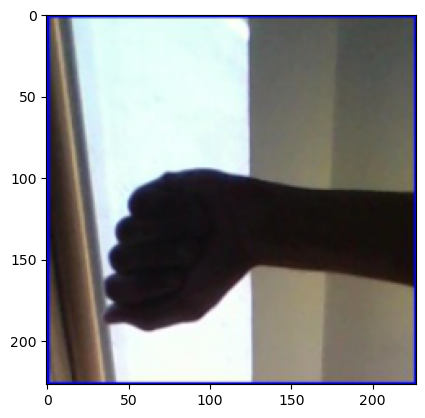

tensor([1])


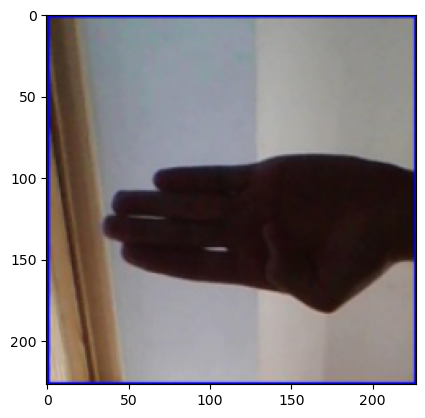

tensor([2])


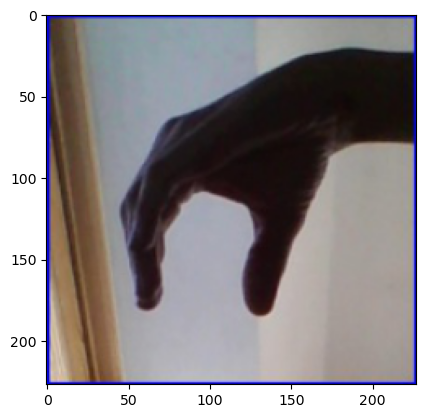

tensor([3])


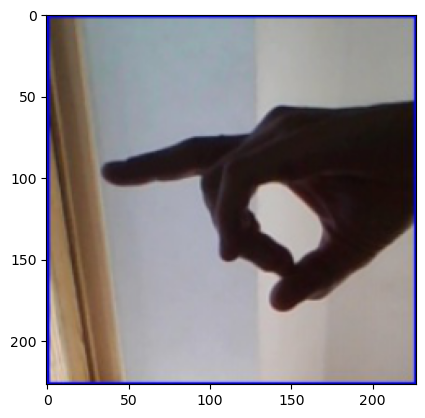

tensor([4])


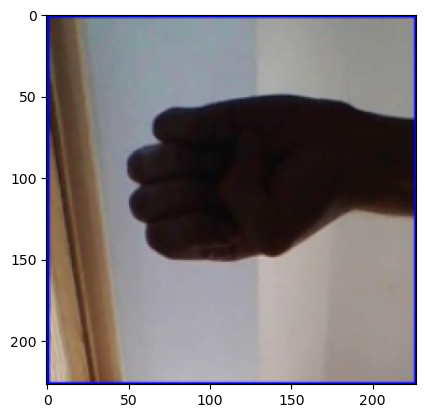

tensor([5])


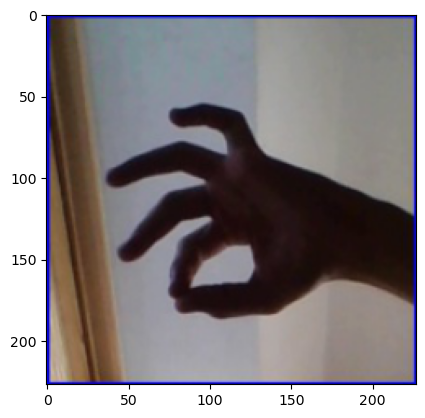

tensor([6])


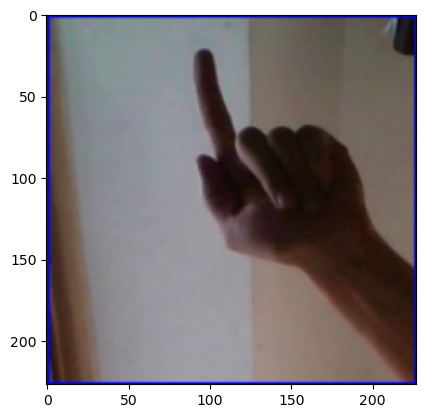

tensor([7])


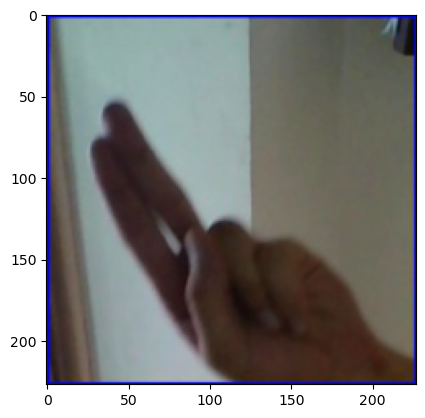

tensor([8])


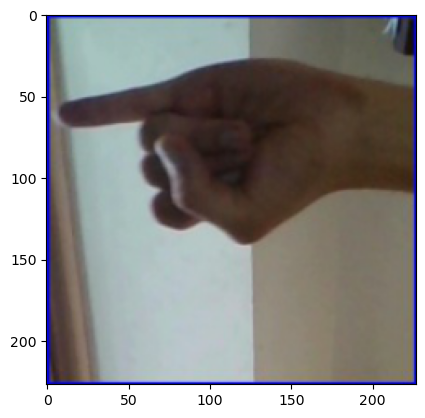

tensor([9])


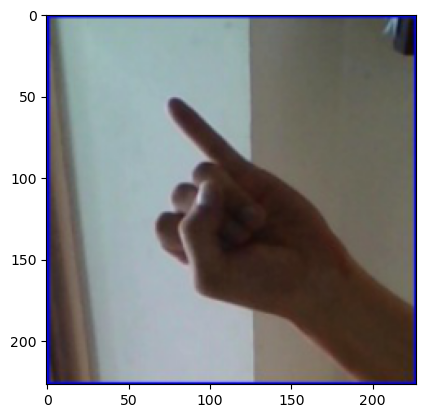

tensor([10])


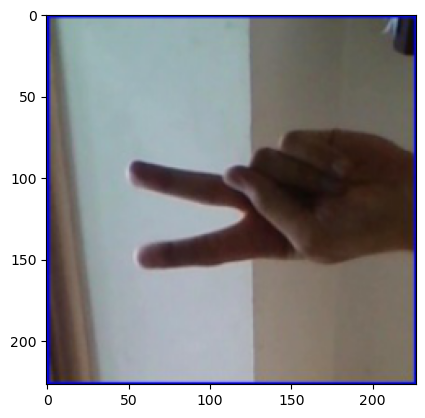

tensor([11])


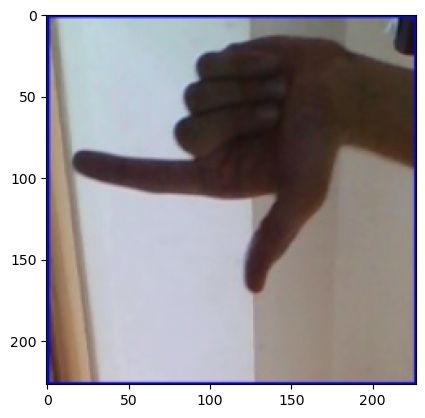

tensor([12])


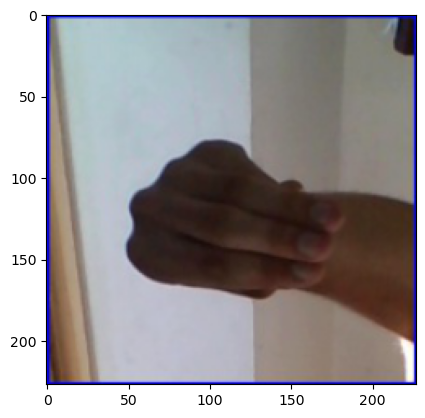

tensor([13])


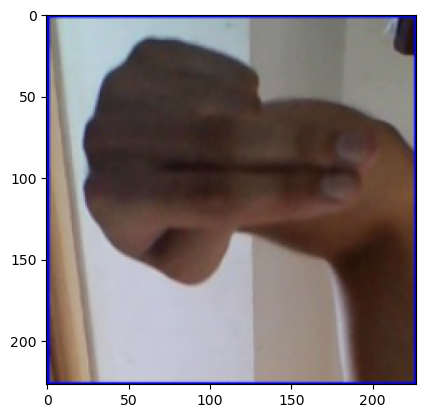

tensor([14])


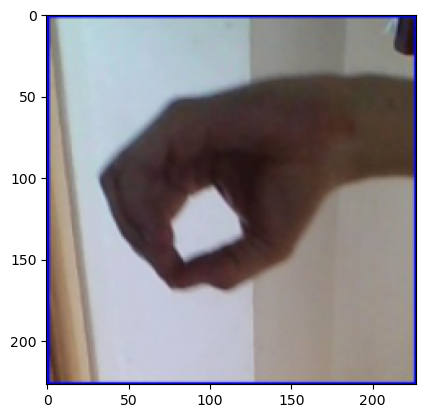

tensor([15])


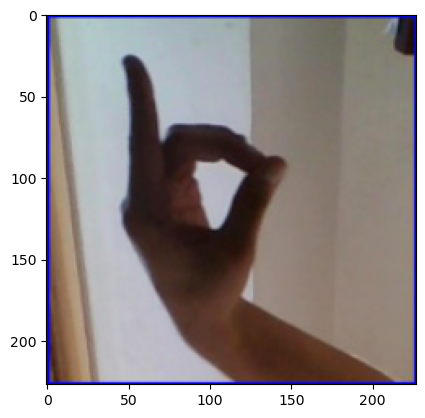

tensor([16])


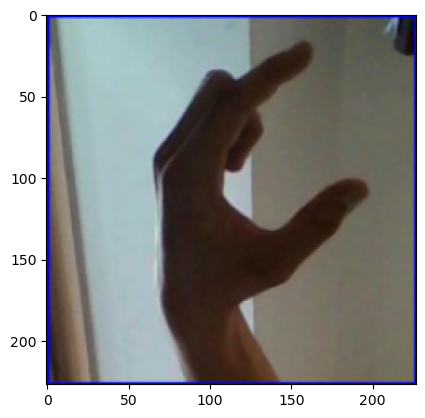

tensor([17])


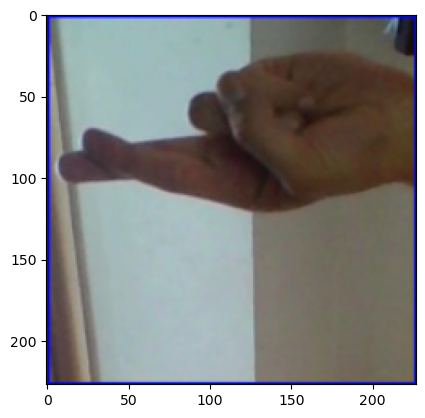

tensor([18])


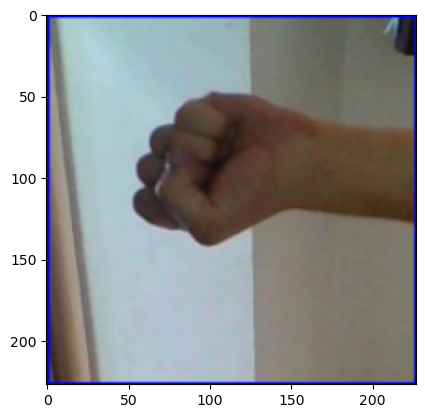

tensor([19])


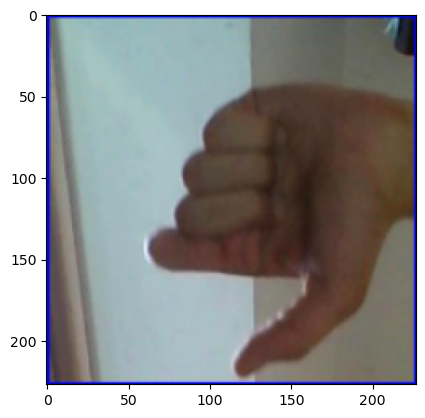

tensor([20])


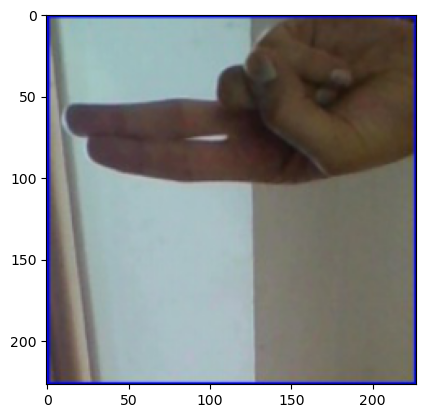

tensor([21])


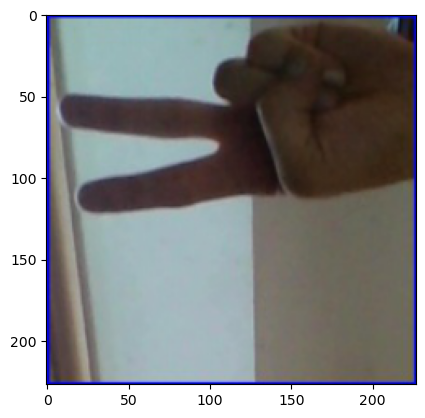

tensor([22])


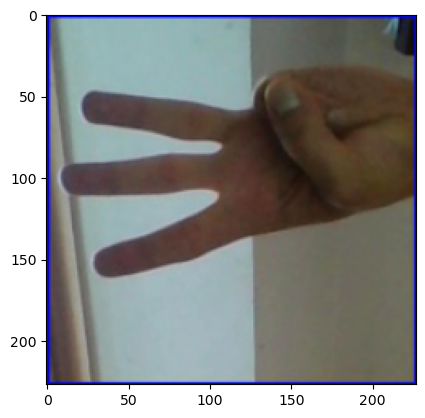

tensor([23])


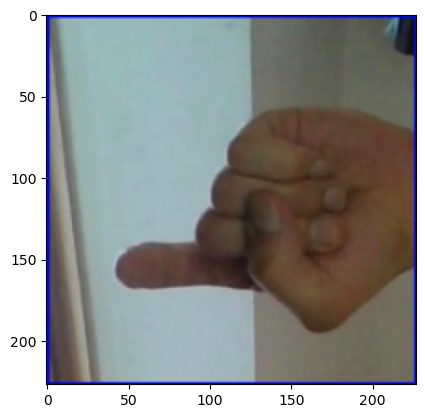

tensor([24])


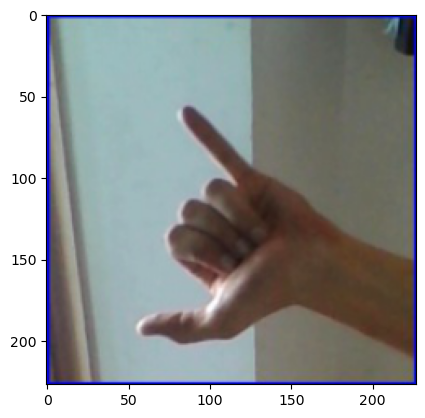

tensor([25])


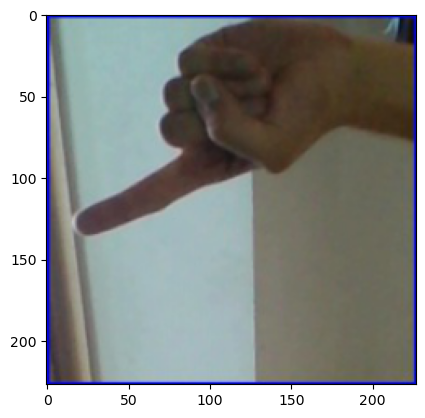

tensor([27])


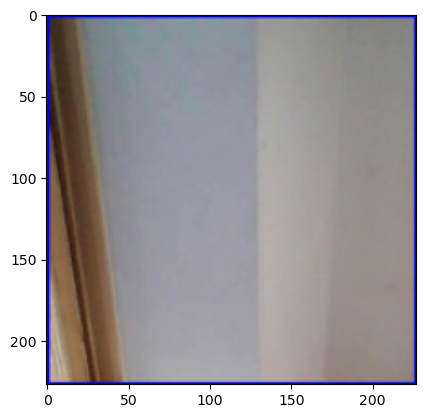

tensor([28])


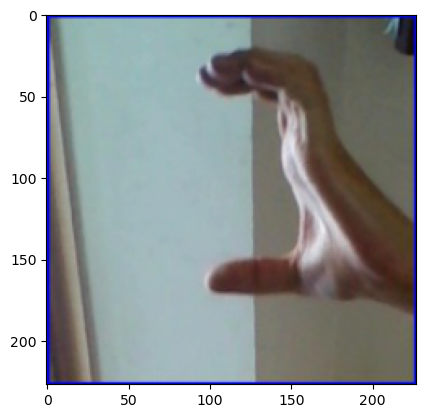

In [48]:
transformer = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])

for i in range(28):
    #img = train_data[7003][0]
    img = alex_test_dataloader.dataset[i][0]
    #plt.show(img.T)
    alex_net.eval()
    with torch.no_grad():
        image_tensor = transformer(img)
        image_tensor.unsqueeze_(0)
        outputs = alex_net(image_tensor)
        _, predicted = torch.max(outputs, 1)
        print(predicted)
        plt.imshow(alex_test_dataloader.dataset[i][0].T)
        plt.show()

In [49]:
#Saving the trained model
SAVED_MODEL_PATH = "./alex_net_sign.pth"
torch.save(alex_net.state_dict(), SAVED_MODEL_PATH)